In [ ]:
import sys
import os
sys.path.append(os.path.abspath(".."))

# MLP (Multilayer Perceptron)

In [26]:
from utils.dataset_loader import FashionMNIST, CIFAR10, split_large_dataset

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [4]:
seed_value = 21
batch_size=32

In [5]:
f_dataset = FashionMNIST(batch_size=batch_size, seed=seed_value)

train_ds = f_dataset.get_dataloader(train=True)
test_ds = f_dataset.get_dataloader(train=False)

for imgs, labels in train_ds.take(1):
    print("image batch shape: ", imgs.shape)
    print("X type: ", imgs.dtype)
    print("Label batch: ", labels.numpy())
    print("labels: ", f_dataset.text_labels(labels))


image batch shape:  (32, 28, 28, 1)
X type:  <dtype: 'float32'>
Label batch:  [9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4 5 3]
labels:  ['Ankle boot', 'Top/T-shirt', 'Top/T-shirt', 'Dress', 'Top/T-shirt', 'Pullover', 'Sneaker', 'Pullover', 'Sandal', 'Sandal', 'Top/T-shirt', 'Ankle boot', 'Sandal', 'Sandal', 'Sneaker', 'Ankle boot', 'Trouser', 'Top/T-shirt', 'Shirt', 'Coat', 'Dress', 'Trouser', 'Coat', 'Bag', 'Coat', 'Dress', 'Top/T-shirt', 'Pullover', 'Coat', 'Coat', 'Sandal', 'Dress']


In [6]:
c_dataset = CIFAR10(batch_size=batch_size, seed=seed_value)

train_ds_10 = c_dataset.get_dataloader(train=True)
test_ds_10 = c_dataset.get_dataloader(train=False)

for imgs2, labels2 in train_ds_10.take(1):
    print("image batch shape: ", imgs2.shape)
    print("X type: ", imgs2.dtype)
    print("Label batch: ", labels2.numpy())
    print("labels: ", c_dataset.text_labels(labels2))


image batch shape:  (32, 28, 28, 3)
X type:  <dtype: 'float32'>
Label batch:  [6 9 9 4 1 1 2 7 8 3 4 7 7 2 9 9 9 3 2 6 4 3 6 6 2 6 3 5 4 0 0 9]
labels:  ['frog', 'truck', 'truck', 'deer', 'automobile', 'automobile', 'bird', 'horse', 'ship', 'cat', 'deer', 'horse', 'horse', 'bird', 'truck', 'truck', 'truck', 'cat', 'bird', 'frog', 'deer', 'cat', 'frog', 'frog', 'bird', 'frog', 'cat', 'dog', 'deer', 'airplane', 'airplane', 'truck']


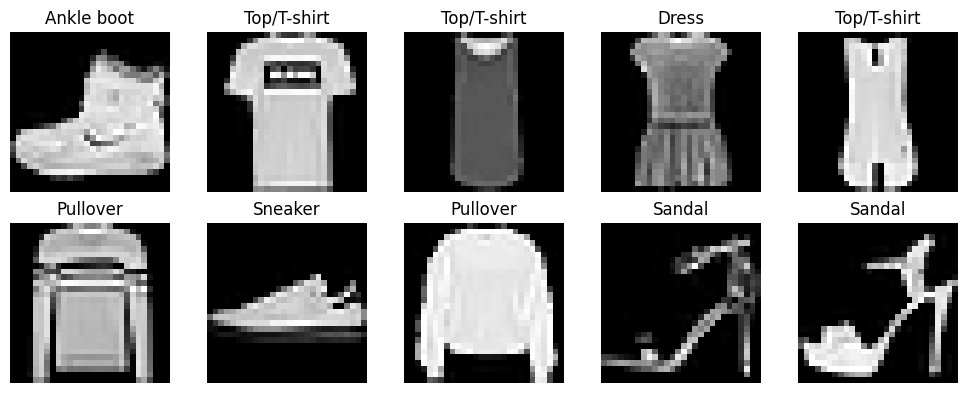

In [7]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(imgs[i].numpy().squeeze(), cmap='gray')
    plt.title(f_dataset.text_labels([labels[i]])[0])
    plt.axis('off')
plt.tight_layout()
plt.show()

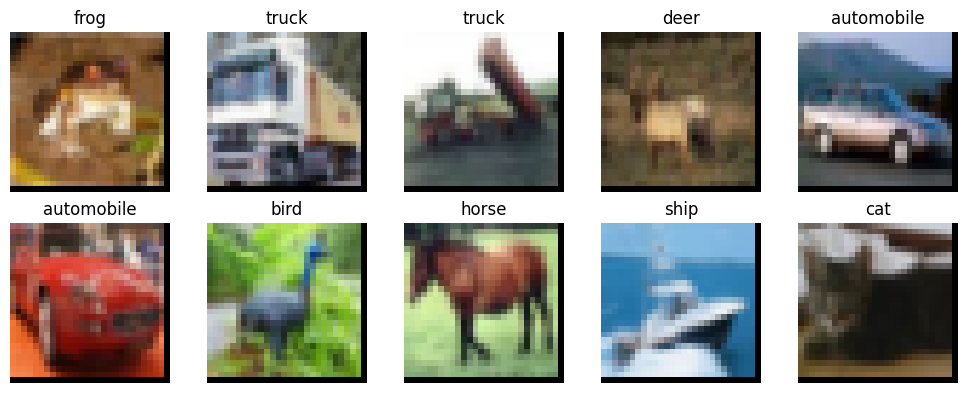

In [8]:
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(imgs2[i].numpy().squeeze(), cmap='gray')
    plt.title(c_dataset.text_labels([labels2[i]])[0])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [9]:
# Get input shape dynamically from dataset
for X, y in train_ds.take(1):
    input_shape = X.shape[1:]  # (28, 28, 1) for FashionMNIST
    print("Input shape:", input_shape)


Input shape: (28, 28, 1)


## Training the model on Fashion-MNIST

### Single hidden layer

Start with MLP with a single hidden layer and 256 hidden units. It's convenient for the number of hidden units to be divisible by larger powers of 2, for memory allocation reasons.

In [ ]:
from utils.model_loader import MLPscratch

In [11]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    min_delta=1e-5,
    restore_best_weights=True,
    verbose=1
)


In [12]:
num_classes = 10

mlp_model = MLPscratch(input_shape=input_shape, num_classes=num_classes, num_hiddens=256, seed_value=seed_value)
mlp_model.MLP(lr=5e-4)

train_data, val_data = split_large_dataset(train_ds, batch_size=batch_size, total_size=len(f_dataset.train_ds[0]))

history = mlp_model.mlp_model.fit(
    train_data,
    validation_data=val_data,
    epochs=50,
    callbacks=[early_stop]
)


Epoch 1/50
   1478/Unknown 4s 2ms/step - accuracy: 0.7635 - loss: 0.6826

e:\intro-to-ml-basics\basics-ml\Lib\site-packages\keras\src\trainers\epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7643 - loss: 0.6802 - val_accuracy: 0.8562 - val_loss: 0.4078
Epoch 2/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8558 - loss: 0.4003 - val_accuracy: 0.8658 - val_loss: 0.3760
Epoch 3/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8704 - loss: 0.3525 - val_accuracy: 0.8745 - val_loss: 0.3545
Epoch 4/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8806 - loss: 0.3225 - val_accuracy: 0.8775 - val_loss: 0.3454
Epoch 5/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8908 - loss: 0.3007 - val_accuracy: 0.8804 - val_loss: 0.3330
Epoch 6/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8952 - loss: 0.2813 - val_accuracy: 0.8814 - val_loss: 0.3270
Epoch 7/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9019 - loss: 0.2660 - val_accuracy: 0.8841 - val_loss: 0.3230
Epoch 8/50
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9054 - loss: 0.2528 - val_accurac

In [13]:
test_loss, test_accuracy = mlp_model.mlp_model.evaluate(test_ds)
print(f"Test Accuracy with shallow MLP: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8819 - loss: 0.3526
Test Accuracy with shallow MLP: 88.26%


### Deeper model to increase the capacity

Three hidden layers with 512, 256 and 128 hidden units is added.

Param initialization is tied with the choice of non-linear activation function. It determines how quickly the model converges. He initialization is used with ReLU activation. 
Initialization is important to avoid vanishing or exploding gradients.

For fully connected layers without non-linearities:

$$
o_i = \sum_{j=1}^{n_{in}} w_{ij}x_i
 $$

where, 
$
X \sim \mathcal{N}\left(0, \gamma^2\right)
$ and, 
$
W \sim \mathcal{N}\left(0, \sigma^2\right)
$.

So, the variance of the output in forward pass, 
$$
Var[o_i] = n_{in}\sigma^2\gamma^2
$$

For a fixed variance, $n_{in}\sigma^2 = 1$. Similarly, for the backward pass, $n_{out}\sigma^2 = 1$

As, both conditions can't be satisfied simultaneously, we take instead, 
$$ \frac{1}{2}(n_{in}+n_{out})\sigma^2 = 1 $$

this is called Xavier initialization (Glorot).

In the case of He initialization, as ReLU activation zeros out the negative initialization (about 50%),
He normal initialization:

$$
W \sim \mathcal{N}\left(0, \frac{2}{n_{\text{in}}}\right)
$$

or, for uniform distribution, as variance is $\frac{a^2}{3}$,
$$
W \sim \mathcal{U}\left(-\sqrt{\frac{6}{n_{\text{in}}}}, \sqrt{\frac{6}{n_{\text{in}}}} \right)
$$

#### Adding dropout layers to break symmetry in parameterization.

Due to the permutation symmetry among the hidden units of each layer, if any two hidden units in a single layer have the same weights and biases, they become redundant, and the architecture appears smaller than the actual capacity. 
Each intermediate activation is replaced by,
$$
h' =
\begin{cases}
0 & \text{with dropout probability p } \\
\frac{h}{1-p} & \text{otherwise }
\end{cases}
$$
while the expectation remains unchanges, $E[h'] = h$

In [25]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6, verbose=1
)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    'saved_models/best.keras', monitor='val_loss', save_best_only=True
)

In [ ]:
from utils.dying_neuron_test import DyingNeuronMonitor

# Instantiate your model
deep_model = MLPscratch(input_shape=input_shape, num_classes=num_classes, seed_value=seed_value)
deep_model.deeperMLP(lr=1e-4)

# Prepare the dying neuron monitor callback
monitor = DyingNeuronMonitor(data=val_data, threshold=0.99) #look for neurons that are inactive 99% of the time

# Train with both early stopping and dying neuron monitoring
history_deeper = deep_model.model.fit(
    train_data.repeat(),  # ensure no data exhaustion
    validation_data=val_data.repeat(),
    epochs=100,
    callbacks=[early_stop, reduce_lr, checkpoint], #add monitor to check for dying neurons using relu activation
    steps_per_epoch=1500,   # len(train data)//batch size
    validation_steps=375   # len(val data)//batch size
)


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6259 - loss: 1.3016 - val_accuracy: 0.8413 - val_loss: 0.6193 - learning_rate: 1.0000e-04
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8111 - loss: 0.7195 - val_accuracy: 0.8612 - val_loss: 0.5585 - learning_rate: 1.0000e-04
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8353 - loss: 0.6378 - val_accuracy: 0.8674 - val_loss: 0.5373 - learning_rate: 1.0000e-04
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8460 - loss: 0.5967 - val_accuracy: 0.8726 - val_loss: 0.5170 - learning_rate: 1.0000e-04
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8550 - loss: 0.5686 - val_accuracy: 0.8764 - val_loss: 0.4970 - learning_rate: 1.0000e-04
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8635 - loss: 0.5398 - val_accuracy: 0.8798 - val_loss: 0.4869 - learning_rate: 1.0000e-04
Epoch 7/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s

In [16]:
test_loss_d, test_accuracy_d = deep_model.model.evaluate(test_ds)
print(f"Test Accuracy with a deeper MLP: {test_accuracy_d * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8839 - loss: 0.4724
Test Accuracy with a deeper MLP: 88.46%


Test accuracy is 1.59% less than training accuracy for the deeper MLP. So, we can say that the model is not overfitting. But there isn't a drastic impovement with model complexity. That indicates that the fashion MNIST dataset doesnot benefit greatly from a higher model capacity.

The deeper model may have a higher test loss than the shallow model, but it has a higher accuracy.

## Plotting the model training

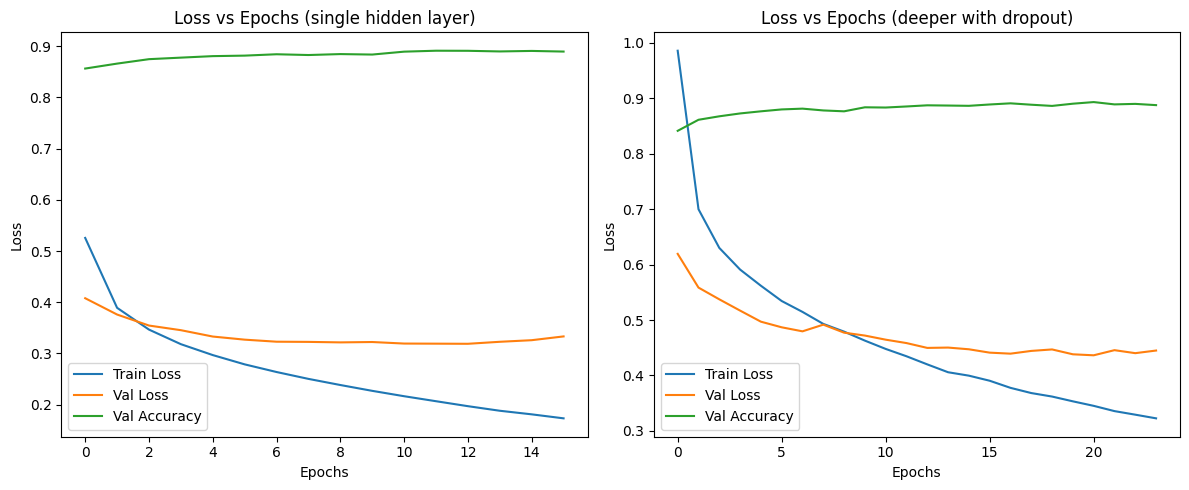

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot 1: Trained with single hidden layer MLP
axes[0].plot(history.history['loss'], label='Train Loss')
axes[0].plot(history.history['val_loss'], label='Val Loss')
axes[0].plot(history.history['val_accuracy'], label='Val Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss vs Epochs (single hidden layer)')
axes[0].legend()

# Plot 2: Deeper MLP with dropout
axes[1].plot(history_deeper.history['loss'], label='Train Loss')
axes[1].plot(history_deeper.history['val_loss'], label='Val Loss')
axes[1].plot(history_deeper.history['val_accuracy'], label='Val Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss vs Epochs (deeper with dropout)')
axes[1].legend()

plt.tight_layout()  # Auto-adjust spacing between plots
plt.show()


## Testing on  CIFAR-10 dataset

In [18]:
# Get input shape dynamically from dataset
for X, y in train_ds_10.take(1):
    input_shape_c = X.shape[1:]  
    print("Input shape:", input_shape_c)


Input shape: (28, 28, 3)


In [19]:
num_classes = 10

mlp_model_on_c = MLPscratch(input_shape=input_shape_c, num_classes=num_classes, num_hiddens=256, seed_value=seed_value)
mlp_model_on_c.MLP(lr=5e-4)

train_data_c, val_data_c = split_large_dataset(train_ds_10, batch_size=batch_size, total_size=len(c_dataset.train_ds[0]))

history_on_c = mlp_model_on_c.mlp_model.fit(
    train_data_c,
    validation_data=val_data_c,
    epochs=50,
    callbacks=[early_stop]
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.2844 - loss: 1.9820 - val_accuracy: 0.3582 - val_loss: 1.7932
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.3890 - loss: 1.7193 - val_accuracy: 0.3837 - val_loss: 1.7336
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.4178 - loss: 1.6451 - val_accuracy: 0.4101 - val_loss: 1.6748
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.4376 - loss: 1.5938 - val_accuracy: 0.4198 - val_loss: 1.6502
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 13ms/step - accuracy: 0.4537 - loss: 1.5508 - val_accuracy: 0.4238 - val_loss: 1.6324
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 12ms/step - accuracy: 0.4614 - loss: 1.5211 - val_accuracy: 0.4267 - val_loss: 1.6213
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.4717 - loss: 1.4951 - val_accuracy: 0.4345 - val_loss: 1.6012
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.4787 - los

In [20]:
test_loss, test_accuracy = mlp_model_on_c.mlp_model.evaluate(test_ds_10)
print(f"Test Accuracy with a shallow MLP: {test_accuracy * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4745 - loss: 1.5135
Test Accuracy with a shallow MLP: 46.95%


### Using deeper MLP on CIFAR

In [21]:
checkpoint_c = tf.keras.callbacks.ModelCheckpoint(
    'saved_models/best_cifar10.keras', monitor='val_loss', save_best_only=True
)

Abandoning early-stoping for deeper MLP.

In [ ]:
from utils.dying_neuron_test import DyingNeuronMonitor

# Instantiate your model
deep_model_on_c = MLPscratch(input_shape=input_shape_c, num_classes=num_classes, seed_value=seed_value)
deep_model_on_c.deeperMLP(lr=1e-4, num_hidden1=1024, num_hidden2=512, num_hidden3=256, dropout_rate1=0.3, dropout_rate2=0.4, dropout_rate3=0.5, slope=0.09)

# Prepare the dying neuron monitor callback
monitor = DyingNeuronMonitor(data=val_data_c, threshold=0.99) #look for neurons that are inactive 99% of the time

# Train with both early stopping and dying neuron monitoring
history_deeper_on_c = deep_model_on_c.model.fit(
    train_data_c.repeat(),  # ensure no data exhaustion
    validation_data=val_data_c.repeat(),
    epochs=100,
    callbacks=[reduce_lr, checkpoint], #add monitor to check for dying neurons using relu activation
    steps_per_epoch=1500,   # len(train data)//batch size
    validation_steps=375   # len(val data)//batch size
)


Epoch 1/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.2381 - loss: 2.6736 - val_accuracy: 0.4141 - val_loss: 2.0104 - learning_rate: 1.0000e-04
Epoch 2/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.3410 - loss: 2.2385 - val_accuracy: 0.4267 - val_loss: 1.9518 - learning_rate: 1.0000e-04
Epoch 3/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.3807 - loss: 2.0993 - val_accuracy: 0.4584 - val_loss: 1.8757 - learning_rate: 1.0000e-04
Epoch 4/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.4122 - loss: 1.9944 - val_accuracy: 0.4720 - val_loss: 1.8420 - learning_rate: 1.0000e-04
Epoch 5/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 23s 16ms/step - accuracy: 0.4315 - loss: 1.9286 - val_accuracy: 0.4516 - val_loss: 1.8881 - learning_rate: 1.0000e-04
Epoch 6/100
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.4530 - loss: 1.8573 - val_accuracy: 0.4796 - val_loss: 1.7835 - learning_rate: 1.0000e-04
Epoch 7/100
1500/1500 ━━━━━━━━━━━━

In [23]:
test_loss_d, test_accuracy_d = deep_model_on_c.model.evaluate(test_ds_10)
print(f"Test Accuracy with a deeper MLP: {test_accuracy_d * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5783 - loss: 1.4629
Test Accuracy with a deeper MLP: 57.34%


An accuracy around 50% indicates that the model is not learning and may be underfit. Even increasing the model complexity is not showing significant improvement. The training loss decreases very slowly.

When a model underfits, increasing the capacity often helps. This is done by either increasing the depth (the number of hidden layers) or by increasing the number of hidden units in a layer. But this does not significantly improve the performance on CIFAR data.

## Plotting the training

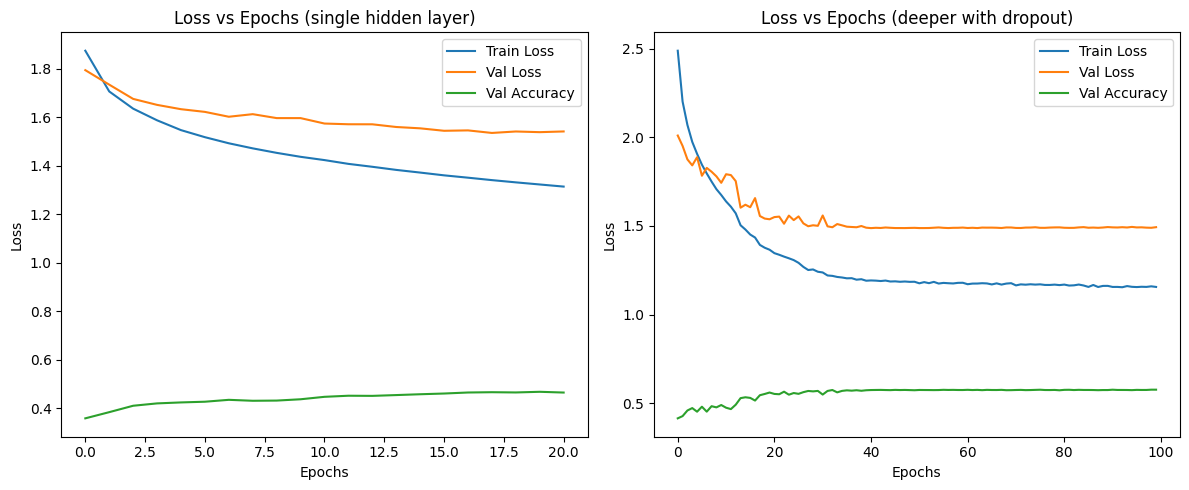

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Plot 1: Trained with single hidden layer MLP
axes[0].plot(history_on_c.history['loss'], label='Train Loss')
axes[0].plot(history_on_c.history['val_loss'], label='Val Loss')
axes[0].plot(history_on_c.history['val_accuracy'], label='Val Accuracy')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].set_title('Loss vs Epochs (single hidden layer)')
axes[0].legend()

# Plot 2: Deeper MLP with dropout
axes[1].plot(history_deeper_on_c.history['loss'], label='Train Loss')
axes[1].plot(history_deeper_on_c.history['val_loss'], label='Val Loss')
axes[1].plot(history_deeper_on_c.history['val_accuracy'], label='Val Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Loss')
axes[1].set_title('Loss vs Epochs (deeper with dropout)')
axes[1].legend()

plt.tight_layout()  # Auto-adjust spacing between plots
plt.show()


The training plot for the deeper MLP appears noisy and loss plateus quickly. A more complex architecture like CNN is needed for classification on CIFAR dataset.